In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('D:/TI project/trial/train',
                                        target_size= (224,224),
                                        batch_size=10,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'D:\TI project\trial\validation',
                                        target_size= (224,224),
                                        batch_size=10,
                                        class_mode='binary')


Found 623 images belonging to 2 classes.
Found 366 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'pass': 0, 'reject': 1}

In [5]:
train_dataset.dtype

'float32'

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# CNN model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

In [35]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=20,
                   validation_data=validation_dataset)

Epoch 1/20
10/10 [==============================] - 12s 1s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9945
Epoch 2/20
10/10 [==============================] - 5s 469ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9918
Epoch 3/20
10/10 [==============================] - 5s 464ms/step - loss: 0.0217 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9918
Epoch 4/20
10/10 [==============================] - 5s 493ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9918
Epoch 5/20
10/10 [==============================] - 5s 459ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9918
Epoch 6/20
10/10 [==============================] - 5s 460ms/step - loss: 9.8005e-04 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9918
Epoch 7/20
10/10 [==============================] - 5s 471ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9891
Epoc

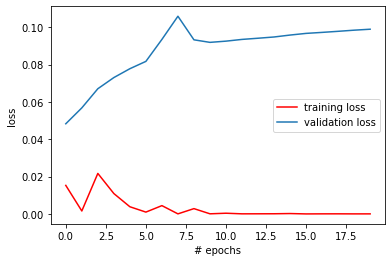

In [37]:
from matplotlib import pyplot as plt

plt.plot(model_fit.history['loss'],'r',label='training loss')
plt.plot(model_fit.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

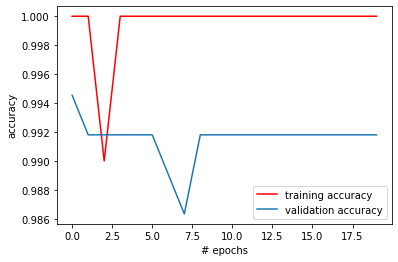

In [38]:
plt.plot(model_fit.history['accuracy'],'r',label='training accuracy')
plt.plot(model_fit.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

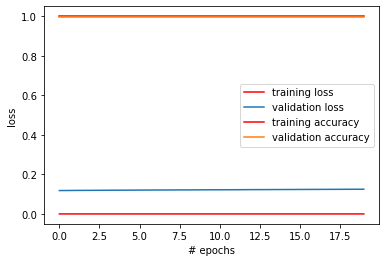

In [24]:
from matplotlib import pyplot as plt

plt.plot(model_fit.history['loss'],'r',label='training loss')
plt.plot(model_fit.history['val_loss'],label='validation loss')
plt.plot(model_fit.history['accuracy'],'r',label='training accuracy')
plt.plot(model_fit.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
scores= model.evaluate(validation_dataset, verbose=15)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("new_chain_test_model.h5")

accuracy: 98.91%


In [30]:
model.save("chain_detector.model", save_format="h5")

In [31]:
model = tf.keras.models.load_model('chain_detector.model')
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#save tflite model
tflite_model = converter.convert()
open("model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpcmdd3u3d\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpcmdd3u3d\assets


89009948

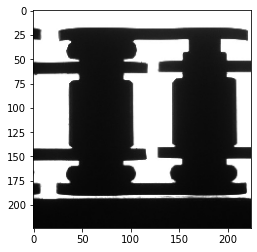

REJECT


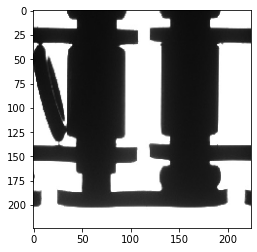

REJECT


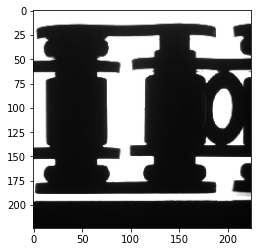

REJECT


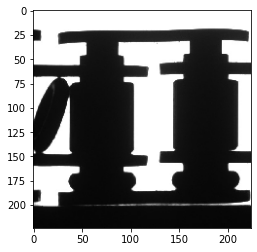

REJECT


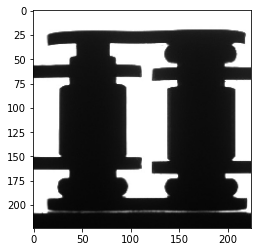

REJECT


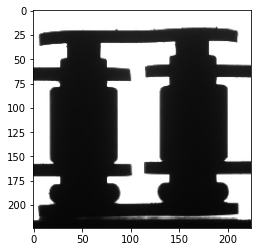

REJECT


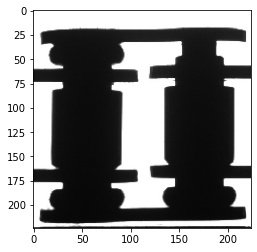

REJECT


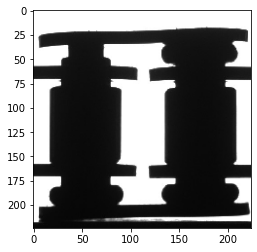

REJECT


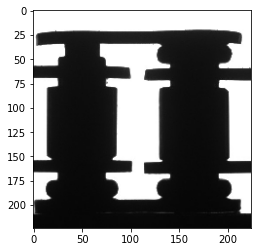

REJECT


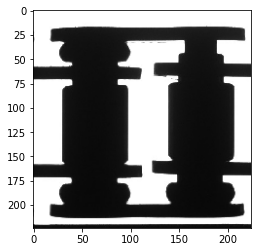

REJECT


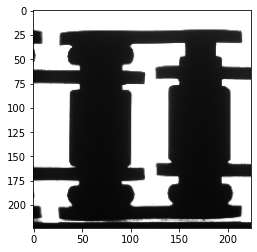

REJECT


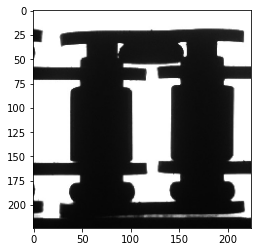

REJECT


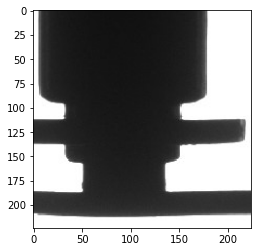

REJECT


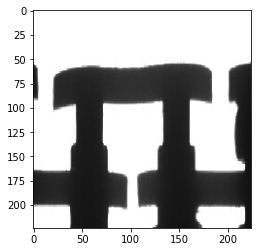

REJECT


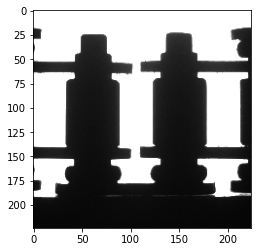

REJECT


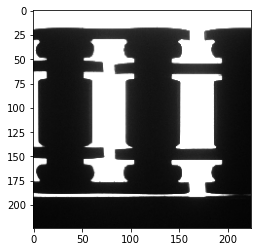

PASS


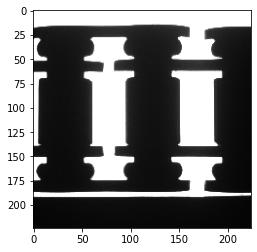

PASS


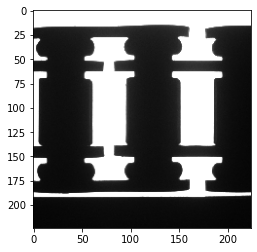

PASS


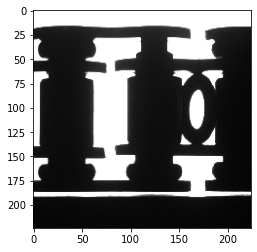

REJECT


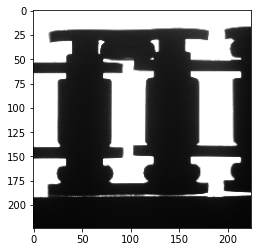

REJECT


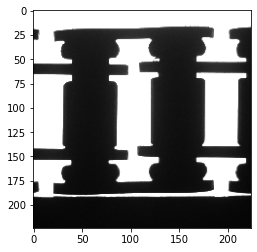

PASS


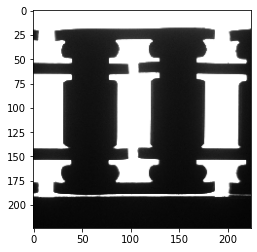

PASS


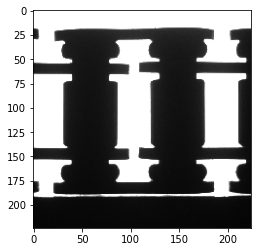

PASS


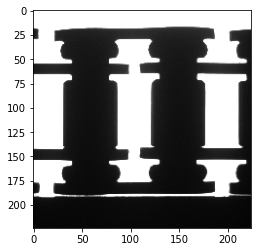

PASS


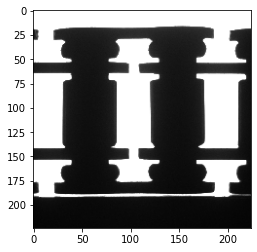

PASS


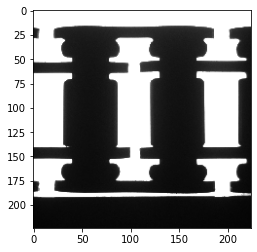

PASS


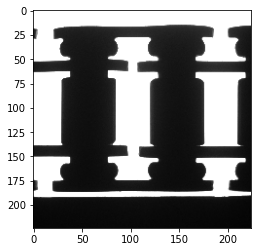

PASS


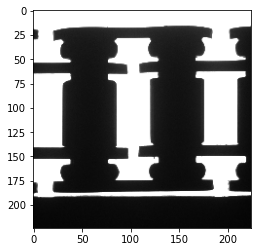

PASS


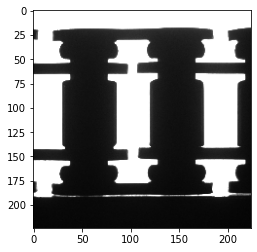

PASS


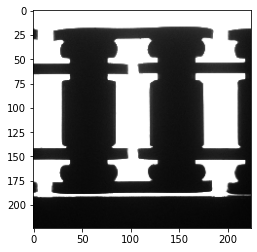

PASS


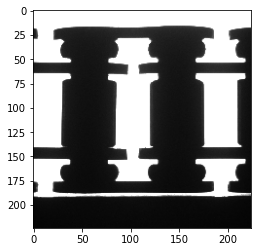

PASS


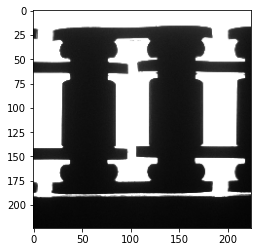

PASS


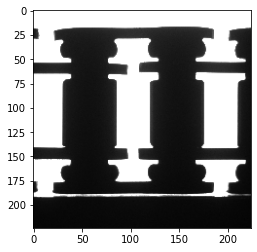

PASS


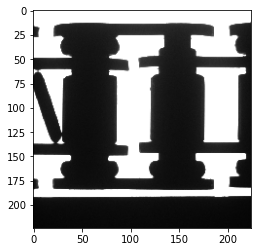

REJECT


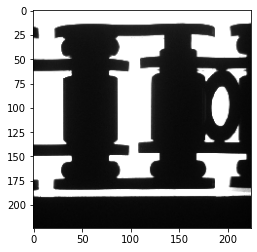

REJECT


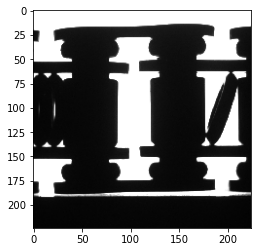

REJECT


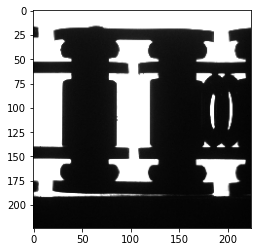

REJECT


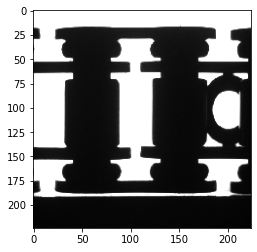

REJECT


In [17]:
dir_path=r'D:\TI project\trial\test'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    array=image.img_to_array(img)
    new=np.expand_dims(array,axis=0)
    images=np.vstack([new])
    result=model.predict(images)
    
    if result <=0:
        print("PASS")
        
    else:
        print("REJECT")

In [34]:
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np
import cv2

model = load_model("new_chain_test_model.h5")

#chain_clsfr=cv2.CascadeClassifier('cascade.xml')

source=cv2.VideoCapture('reject.avi')
#img=cv2.imread(r'D:\TI project\project Code\dataset\train\OK\Image00002.BMP')


while(source.isOpened()):

    ret,img=source.read()
    if ret == True:
         
        resized=cv2.resize(img,(224,224))
        array=image.img_to_array(resized)
        new=np.expand_dims(array,axis=0)
        images=np.vstack([new])
        result=model.predict(images)

        if result==0:
            cv2.rectangle(img,(30,5),(550,450),(50,250,50),2)
            cv2.rectangle(img,(30,5),(200,50),(50,225,50),-1)
            cv2.putText(img,'PASS',(30,30),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
        else:
            cv2.rectangle(img,(30,5),(550,450),(0,0,255),5)
            cv2.rectangle(img,(30,5),(200,50),(0,0,255),-1)
            cv2.putText(img,'REJECT',(30,30),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
            
          
        cv2.imshow('LIVE',img)
        key=cv2.waitKey(0)
        if(key==27):
            break
    else:
        break

source.release()  
cv2.destroyAllWindows()
